In [4]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [11]:
# Now let's make the ANN!

from tensorflow.keras.models import Sequential #to make sure Frw & back propogation 
from tensorflow.keras.layers import Dense #to create hidden, input & output layer 
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,Activation #activation funcations 
from tensorflow.keras.layers import Dropout #it is to prevent the overfitting in ANN. if we set it at 0.3 then it will 
# deactivate the entire 30% of the neuron from the network and rest nruon will be working 

# Initialising the ANN
classifier = Sequential()

# Adding the input layer 
classifier.add(Dense(units=11,activation='relu')) #as no of variables in x_train=11

# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #by default adam uses learing rate as 0.25

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)



Epoch 1/50


536/536 [==============================] - 3s 4ms/step - loss: 0.6528 - accuracy: 0.6865 - val_loss: 0.5202 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5143 - accuracy: 0.7949 - val_loss: 0.4694 - val_accuracy: 0.7948
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4729 - accuracy: 0.8011 - val_loss: 0.4387 - val_accuracy: 0.8073
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4525 - accuracy: 0.8044 - val_loss: 0.4195 - val_accuracy: 0.8122
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8140 - val_loss: 0.4042 - val_accuracy: 0.8194
Epoch 6/50
536/536 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8184 - val_loss: 0.3978 - val_accuracy: 0.8251
Epoch 7/50
536/536 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8210 - val_loss: 0.3888 - val_accuracy: 0.8300
Ep

In [12]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [13]:
#early stopping is done if after some time my loss stop decresing with increase in epoch

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10, # wait for 20 epochs if no imporovment in loss then stop the algo
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True, # Restore the weights of the best model when early stopping happnes
    start_from_epoch=0
)

In [14]:

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.8543 - val_loss: 0.3613 - val_accuracy: 0.8455
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8503 - val_loss: 0.3628 - val_accuracy: 0.8485
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8524 - val_loss: 0.3593 - val_accuracy: 0.8497
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.8500 - val_loss: 0.3618 - val_accuracy: 0.8493
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8524 - val_loss: 0.3622 - val_accuracy: 0.8485
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8530 - val_loss: 0.3595 - val_accuracy: 0.8474
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8528 - val_loss: 0.3578 - val_accuracy: 0.8478

#####  We can see validation loss does not improve that much after second epoch 

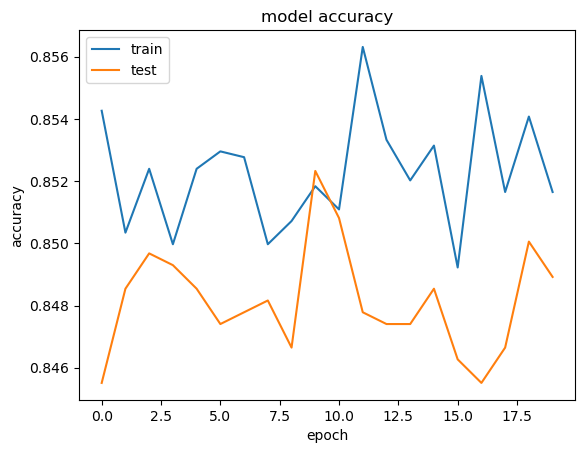

In [15]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

When we compare the Test and Train data accuracy at every epoch there is very low deivation as y axis is working in a very narrow range  

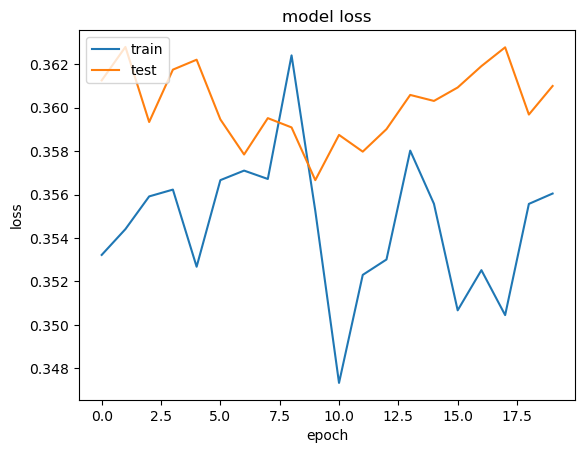

In [16]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

When we compare the Test and Train data loss at every epoch same behaviour we can observe

In [17]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1530,   65],
       [ 217,  188]], dtype=int64)

In [19]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.859

In [20]:
# Classification report 
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Print the report
print(report)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



With accuracy of 0.86 it is a good model though can be imporved more but , mostly it works for any application 

In [21]:
#get the weights
classifier.get_weights()[0]

array([[-2.01811403e-01,  1.57732785e-01, -2.29594395e-01,
        -4.52747494e-02, -9.88736004e-02, -1.12270657e-02,
        -2.42278889e-01, -3.60037833e-02, -6.88772574e-02,
         1.75958782e-01,  9.90658179e-02],
       [-8.73316228e-02,  6.66043013e-02, -7.68055916e-01,
         5.92976153e-01,  1.30309597e-01,  9.99462008e-02,
         4.33938444e-01, -7.07739174e-01,  5.57997227e-02,
        -8.29448819e-01,  7.06920207e-01],
       [-1.34719098e-02,  3.13435107e-01, -4.15742323e-02,
         4.76185560e-01,  2.29288973e-02,  4.29273769e-02,
         1.18683763e-01,  1.02515295e-01,  1.88446879e-01,
         6.36691824e-02,  8.23766831e-03],
       [-2.46347785e-01, -2.77358860e-01,  5.48888326e-01,
        -3.90263237e-02,  3.78412545e-01,  5.26230372e-02,
         2.16224208e-01, -1.82001144e-01, -8.52957368e-01,
        -1.06139250e-01,  2.43332922e-01],
       [ 3.84736806e-02,  8.64851832e-01,  2.61603426e-02,
         3.04258764e-01,  1.17054880e+00, -6.35155618e-01,
  